In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import matplotlib.pyplot as plt
import copy 
from sklearn import preprocessing
import datetime as dt
from scipy.stats import norm

In [114]:
df_original = pd.read_csv('../WADI_dataset/WADI_attackdataLABLE.csv',  header=0, skiprows=[0], low_memory=False)
df_original

,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
0,1.0,10/9/17,00:00.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
1,2.0,10/9/17,00:01.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
2,3.0,10/9/17,00:02.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
3,4.0,10/9/17,00:03.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
4,5.0,10/9/17,00:04.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172798,172799.0,10/11/17,59:58.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1
172799,172800.0,10/11/17,59:59.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1
172800,172801.0,10/11/17,00:00.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1
172801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [115]:
df_original.columns = df_original.columns.str.replace(' ', '')

In [116]:
all_empty_cols = df_original.columns[df_original.isna().all()]
all_empty_cols



Index(['2_LS_001_AL', '2_LS_002_AL', '2_P_001_STATUS', '2_P_002_STATUS'], dtype='object')

In [117]:
df_na_clean = df_original.drop(columns=['2_LS_001_AL', '2_LS_002_AL', '2_P_001_STATUS', '2_P_002_STATUS'])
df_na_clean = df_na_clean.dropna()
df_na_clean

,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"AttackLABLE(1:NoAttack,-1:Attack)"
0,1.0,10/9/17,00:00.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
1,2.0,10/9/17,00:01.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
2,3.0,10/9/17,00:02.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
3,4.0,10/9/17,00:03.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
4,5.0,10/9/17,00:04.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172796,172797.0,10/11/17,59:56.0,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,59.3546,1.0,0.00,1
172797,172798.0,10/11/17,59:57.0,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,59.3546,1.0,0.00,1
172798,172799.0,10/11/17,59:58.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1
172799,172800.0,10/11/17,59:59.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1


In [118]:
df_na_clean = df_na_clean.drop(columns='Row')
df_na_clean

,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"AttackLABLE(1:NoAttack,-1:Attack)"
0,10/9/17,00:00.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
1,10/9/17,00:01.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
2,10/9/17,00:02.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
3,10/9/17,00:03.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
4,10/9/17,00:04.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172796,10/11/17,59:56.0,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,59.3546,1.0,0.00,1
172797,10/11/17,59:57.0,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,59.3546,1.0,0.00,1
172798,10/11/17,59:58.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1
172799,10/11/17,59:59.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1


In [119]:
df_na_clean['DateTime'] = df_na_clean['Date'] + ' ' + df_na_clean['Time']
df_na_clean = df_na_clean.drop(columns=['Date', 'Time'])
datetimecol = df_na_clean.pop('DateTime')
df_na_clean.insert(0, 'DateTime', datetimecol)

In [120]:
df_na_clean = pd.read_csv('../WADI_dataset/WADI_attackdata_cleaned_v1.csv').drop(columns='Unnamed: 0')
df_na_clean['DateTime'] = pd.to_datetime(df_na_clean['DateTime'])
df_na_clean

C:\Users\arunv\AppData\Local\Temp\ipykernel_21688\1804738677.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_na_clean['DateTime'] = pd.to_datetime(df_na_clean['DateTime'])


,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"AttackLABLE(1:NoAttack,-1:Attack)"
0,2017-10-09 00:00:00,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,1
1,2017-10-09 00:00:01,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,1
2,2017-10-09 00:00:02,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,1
3,2017-10-09 00:00:03,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,1
4,2017-10-09 00:00:04,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172796,2017-10-10 23:59:56,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0,0,55.5587,...,1,1,1,1,1,1,59.3546,1,0.00,1
172797,2017-10-10 23:59:57,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0,0,55.5587,...,1,1,1,1,1,1,59.3546,1,0.00,1
172798,2017-10-10 23:59:58,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0,0,55.7260,...,1,1,1,1,1,1,58.8102,1,0.00,1
172799,2017-10-10 23:59:59,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0,0,55.7260,...,1,1,1,1,1,1,58.8102,1,0.00,1


In [121]:
df_timestamp = df_na_clean['DateTime']
df_timestamp

0        2017-10-09 00:00:00
1        2017-10-09 00:00:01
2        2017-10-09 00:00:02
3        2017-10-09 00:00:03
4        2017-10-09 00:00:04
                 ...        
172796   2017-10-10 23:59:56
172797   2017-10-10 23:59:57
172798   2017-10-10 23:59:58
172799   2017-10-10 23:59:59
172800   2017-10-11 00:00:00
Name: DateTime, Length: 172801, dtype: datetime64[ns]

In [122]:
df_na_clean = df_na_clean.rename(columns={'AttackLABLE(1:NoAttack,-1:Attack)': 'IsAttack'})
df_na_clean['IsAttack'].replace(1, 0, inplace = True)
df_na_clean['IsAttack'].replace(-1, 1, inplace = True)
df_na_clean

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,IsAttack
0,2017-10-09 00:00:00,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
1,2017-10-09 00:00:01,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
2,2017-10-09 00:00:02,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
3,2017-10-09 00:00:03,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
4,2017-10-09 00:00:04,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172796,2017-10-10 23:59:56,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0,0,55.5587,...,1,1,1,1,1,1,59.3546,1,0.00,0
172797,2017-10-10 23:59:57,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0,0,55.5587,...,1,1,1,1,1,1,59.3546,1,0.00,0
172798,2017-10-10 23:59:58,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0,0,55.7260,...,1,1,1,1,1,1,58.8102,1,0.00,0
172799,2017-10-10 23:59:59,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0,0,55.7260,...,1,1,1,1,1,1,58.8102,1,0.00,0


In [123]:
df_attack_pure = df_na_clean.loc[df_na_clean['IsAttack']==1]
# df_attack_pure = df_attack_pure.sample(frac=1).reset_index(drop=True)
df_attack_pure

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,IsAttack
5103,2017-10-09 01:25:03,167.005,0.613474,11.9575,467.477,0.293415,0.000870,0,0,44.9750,...,1,1,1,1,1,1,63.2852,1,0.69,1
5104,2017-10-09 01:25:04,167.005,0.613474,11.9575,467.477,0.293415,0.000870,0,0,44.9750,...,1,1,1,1,1,1,63.2852,1,0.69,1
5105,2017-10-09 01:25:05,167.005,0.613474,11.9575,467.477,0.293415,0.000870,0,0,44.9750,...,1,1,1,1,1,1,63.2852,1,0.69,1
5106,2017-10-09 01:25:06,166.965,0.619474,11.9573,467.522,0.293185,0.001254,0,0,45.1677,...,1,1,1,1,1,1,63.5099,1,0.69,1
5107,2017-10-09 01:25:07,166.965,0.619474,11.9573,467.522,0.293185,0.001254,0,0,45.1677,...,1,1,1,1,1,1,63.5099,1,0.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164219,2017-10-10 21:36:59,181.550,0.673468,12.0246,442.399,0.247478,1.879540,0,0,40.7517,...,1,1,1,1,1,1,60.6146,1,0.51,1
164220,2017-10-10 21:37:00,181.540,0.679466,12.0224,442.180,0.247584,1.848800,0,0,41.0748,...,1,1,1,1,1,1,61.0002,1,0.51,1
164221,2017-10-10 21:37:01,181.540,0.679466,12.0224,442.180,0.247584,1.848800,0,0,41.0748,...,1,1,1,1,1,1,61.0002,1,0.51,1
164222,2017-10-10 21:37:02,181.540,0.679466,12.0224,442.180,0.247584,1.848800,0,0,41.0748,...,1,1,1,1,1,1,61.0002,1,0.51,1


In [124]:
df_normal_pure = df_na_clean.loc[df_na_clean['IsAttack']==0].reset_index(drop=True)
# df_normal_pure = df_normal_pure.sample(frac=1).reset_index(drop=True)
df_normal_pure

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,IsAttack
0,2017-10-09 00:00:00,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
1,2017-10-09 00:00:01,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
2,2017-10-09 00:00:02,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
3,2017-10-09 00:00:03,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
4,2017-10-09 00:00:04,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162819,2017-10-10 23:59:56,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0,0,55.5587,...,1,1,1,1,1,1,59.3546,1,0.00,0
162820,2017-10-10 23:59:57,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0,0,55.5587,...,1,1,1,1,1,1,59.3546,1,0.00,0
162821,2017-10-10 23:59:58,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0,0,55.7260,...,1,1,1,1,1,1,58.8102,1,0.00,0
162822,2017-10-10 23:59:59,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0,0,55.7260,...,1,1,1,1,1,1,58.8102,1,0.00,0


In [125]:
df_normal_train = df_normal_pure[:45000]
df_normal_train['DateTime'] = df_timestamp[:45000]
# df_normal_train.drop(columns='IsAttack', inplace=True)
df_normal_train

C:\Users\arunv\AppData\Local\Temp\ipykernel_21688\421342258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_train['DateTime'] = df_timestamp[:45000]


,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,IsAttack
0,2017-10-09 00:00:00,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
1,2017-10-09 00:00:01,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
2,2017-10-09 00:00:02,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
3,2017-10-09 00:00:03,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
4,2017-10-09 00:00:04,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,...,1,1,1,1,1,1,62.6226,1,0.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2017-10-09 12:29:55,171.898,0.661469,12.0231,453.007,0.228272,1.967730,0,0,55.4154,...,1,1,1,1,1,1,62.6722,1,0.72,0
44996,2017-10-09 12:29:56,171.898,0.661469,12.0231,453.007,0.228272,1.967730,0,0,55.4154,...,1,1,1,1,1,1,62.6722,1,0.72,0
44997,2017-10-09 12:29:57,171.898,0.661469,12.0231,453.007,0.228272,1.967730,0,0,55.4154,...,1,1,1,1,1,1,62.6722,1,0.72,0
44998,2017-10-09 12:29:58,171.898,0.661469,12.0231,453.007,0.228272,1.967730,0,0,55.4154,...,1,1,1,1,1,1,62.6722,1,0.72,0


In [126]:
df_normal_train.to_csv('../WADI_dataset/WADI_normal_train-baseline.csv')

In [127]:
df_attack_train = pd.concat([df_normal_pure[45000:45450], df_attack_pure[:3000], df_normal_pure[46000:46500]]).reset_index(drop=True)
df_attack_train['DateTime'] = df_timestamp[45000:48950].reset_index(drop=True)
# df_attack_train.drop(columns='IsAttack', inplace=True)
df_attack_train

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,IsAttack
0,2017-10-09 12:30:00,171.898,0.661469,12.0231,453.007,0.228272,1.96773,0,0,55.4154,...,1,1,1,1,1,1,62.6722,1,0.72,0
1,2017-10-09 12:30:01,171.911,0.661467,12.0253,452.844,0.228413,1.98745,0,0,55.9301,...,1,1,1,1,1,1,62.7616,1,0.72,0
2,2017-10-09 12:30:02,171.911,0.661467,12.0253,452.844,0.228413,1.98745,0,0,55.9301,...,1,1,1,1,1,1,62.7616,1,0.72,0
3,2017-10-09 12:30:03,171.911,0.661467,12.0253,452.844,0.228413,1.98745,0,0,55.9301,...,1,1,1,1,1,1,62.7616,1,0.72,0
4,2017-10-09 12:30:04,171.911,0.661467,12.0253,452.844,0.228413,1.98745,0,0,55.9301,...,1,1,1,1,1,1,62.7616,1,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,2017-10-09 13:35:45,171.396,0.685467,11.9304,429.091,0.235008,1.84210,0,0,59.1152,...,1,1,1,1,1,1,85.8224,1,2.20,0
3946,2017-10-09 13:35:46,171.396,0.685467,11.9304,429.091,0.235008,1.84210,0,0,59.1152,...,1,1,1,1,1,1,85.8224,1,2.20,0
3947,2017-10-09 13:35:47,171.396,0.685467,11.9304,429.091,0.235008,1.84210,0,0,59.1152,...,1,1,1,1,1,1,85.8224,1,2.20,0
3948,2017-10-09 13:35:48,171.397,0.703463,11.9294,429.058,0.234914,1.93283,0,0,59.2921,...,1,1,1,1,1,1,83.6520,1,2.20,0


In [112]:
df_attack_train.to_csv('../WADI_dataset/WADI_attack_train-baseline.csv')

In [94]:
df_test = pd.concat([df_normal_pure[45450:46000],df_normal_pure[46500:51000], df_attack_pure[3000:3350],
                      df_normal_pure[51000:54600], df_attack_pure[3350:4700],
                        df_normal_pure[54600:59600], df_attack_pure[4700:5500],
                          df_normal_pure[59600:64600], df_attack_pure[5500:5800],
                            df_normal_pure[646000:66600], df_attack_pure[5800:6100],
                              df_normal_pure[66600:76000], df_attack_pure[6100:6700],
                                df_normal_pure[76000:84600], df_attack_pure[6700:6950],
                                  df_normal_pure[84600:84900], df_attack_pure[6950:7700],
                                    df_normal_pure[84900:94600], df_attack_pure[7700:8200],
                                      df_normal_pure[94600:96200], df_attack_pure[8200:8600],
                                        df_normal_pure[96200:99900], df_attack_pure[8600:],
                                          df_normal_pure[999000:]]).reset_index(drop=True)

df_test

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,IsAttack
0,2017-10-10 23:23:08,173.985,0.601475,11.9117,445.110,0.273626,0.001231,0,0,62.8188,...,1,1,1,1,1,1,60.4048,1,0.63,0
1,2017-10-09 14:28:25,169.991,0.583479,11.9396,447.916,0.247626,1.857340,0,0,53.7211,...,1,1,1,1,1,1,61.1832,1,0.39,0
2,2017-10-10 01:28:57,180.096,0.601475,11.9038,454.545,0.273687,0.000999,0,0,55.2023,...,1,1,1,1,1,1,62.8785,1,0.65,0
3,2017-10-10 20:11:06,176.796,0.619473,11.9194,469.458,0.312055,0.001157,0,0,57.6934,...,1,1,1,1,1,1,59.7065,1,0.00,0
4,2017-10-09 05:31:16,168.689,0.637472,11.9164,483.282,0.324942,0.001006,0,0,46.6027,...,1,1,1,1,1,1,62.4645,1,0.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58922,2017-10-09 01:34:43,169.153,0.613474,11.9514,448.034,0.247925,1.918050,0,0,59.8296,...,1,1,1,1,1,1,63.1875,1,0.69,1
58923,2017-10-09 19:41:29,174.755,0.541485,11.9532,458.923,0.279956,0.001211,0,0,61.3268,...,1,1,1,1,1,1,60.8584,1,0.00,1
58924,2017-10-09 01:46:22,170.299,0.643471,11.9300,436.618,0.234896,1.909840,0,0,68.4952,...,1,1,1,1,1,1,62.0779,1,0.69,1
58925,2017-10-09 23:44:08,178.963,0.619473,11.9239,472.023,0.311797,0.001276,0,0,55.4933,...,1,1,1,1,1,1,59.8332,1,0.00,1


In [95]:
df_test['DateTime'] = df_timestamp[48950:].reset_index(drop=True)
df_test

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,IsAttack
0,2017-10-09 13:35:50,173.985,0.601475,11.9117,445.110,0.273626,0.001231,0,0,62.8188,...,1,1,1,1,1,1,60.4048,1,0.63,0
1,2017-10-09 13:35:51,169.991,0.583479,11.9396,447.916,0.247626,1.857340,0,0,53.7211,...,1,1,1,1,1,1,61.1832,1,0.39,0
2,2017-10-09 13:35:52,180.096,0.601475,11.9038,454.545,0.273687,0.000999,0,0,55.2023,...,1,1,1,1,1,1,62.8785,1,0.65,0
3,2017-10-09 13:35:53,176.796,0.619473,11.9194,469.458,0.312055,0.001157,0,0,57.6934,...,1,1,1,1,1,1,59.7065,1,0.00,0
4,2017-10-09 13:35:54,168.689,0.637472,11.9164,483.282,0.324942,0.001006,0,0,46.6027,...,1,1,1,1,1,1,62.4645,1,0.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58922,2017-10-10 05:57:52,169.153,0.613474,11.9514,448.034,0.247925,1.918050,0,0,59.8296,...,1,1,1,1,1,1,63.1875,1,0.69,1
58923,2017-10-10 05:57:53,174.755,0.541485,11.9532,458.923,0.279956,0.001211,0,0,61.3268,...,1,1,1,1,1,1,60.8584,1,0.00,1
58924,2017-10-10 05:57:54,170.299,0.643471,11.9300,436.618,0.234896,1.909840,0,0,68.4952,...,1,1,1,1,1,1,62.0779,1,0.69,1
58925,2017-10-10 05:57:55,178.963,0.619473,11.9239,472.023,0.311797,0.001276,0,0,55.4933,...,1,1,1,1,1,1,59.8332,1,0.00,1


In [96]:
df_test.to_csv('../WADI_dataset/WADI_test.csv')

In [20]:

df_attack[' Timestamp'] = pd.to_datetime(df_attack[' Timestamp'])
df_attack.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [21]:
df_attack = df_attack.rename(columns={"Normal/Attack": "isAttack"})
df_attack['isAttack'] = df_attack['isAttack'].replace('Normal',0)
df_attack['isAttack'] = df_attack['isAttack'].replace('Attack',1)
df_attack['isAttack'] = df_attack['isAttack'].replace('A ttack',1)
df_attack['isAttack'].unique()

array([0, 1], dtype=int64)

In [ ]:
df_attack.to_csv('../SWaT_Dataset/2015/Cleaned_csv/balanced_dag_data_with_y_timestamp.csv')

In [13]:
df_attack.drop(columns=' Timestamp',axis = 1, inplace=True)

In [5]:
df_status_attack = df_attack.loc[df_attack['isAttack'] == 1]

In [6]:
df_status_attack.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,isAttack
1754,2015-12-28 10:29:14,2.493675,817.6742,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,1
1755,2015-12-28 10:29:15,2.535951,817.9490,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,1
1756,2015-12-28 10:29:16,2.535951,817.9490,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,1
1757,2015-12-28 10:29:17,2.569900,818.4592,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,1
1758,2015-12-28 10:29:18,2.610575,818.8911,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,250.0801,1.681991,188.9740,0.000128,1,1,1,1


In [7]:
df_status_attack.reset_index(drop=True)

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,isAttack
0,2015-12-28 10:29:14,2.493675,817.6742,2,1,1,262.625,8.465330,319.7385,0.000000,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,1
1,2015-12-28 10:29:15,2.535951,817.9490,2,1,1,262.625,8.465330,319.7385,0.000000,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,1
2,2015-12-28 10:29:16,2.535951,817.9490,2,1,1,262.625,8.465330,319.7385,0.000000,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,1
3,2015-12-28 10:29:17,2.569900,818.4592,2,1,1,262.625,8.465330,319.7385,0.000000,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,1
4,2015-12-28 10:29:18,2.610575,818.8911,2,1,1,262.625,8.465330,319.7385,0.000000,...,2,1,250.0801,1.681991,188.9740,0.000128,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54616,2016-02-01 13:41:07,2.534670,524.1028,2,2,1,168.899,8.633236,304.5373,2.461026,...,2,1,249.5193,0.945119,187.5801,0.000000,1,1,1,1
54617,2016-02-01 13:41:08,2.517055,524.2206,2,2,1,168.899,8.633236,304.5373,2.461026,...,2,1,249.5193,0.945119,187.5801,0.000000,1,1,1,1
54618,2016-02-01 13:41:09,2.502322,524.2206,2,2,1,168.899,8.633236,304.5373,2.461026,...,2,1,249.5193,0.945119,187.5801,0.000000,1,1,1,1
54619,2016-02-01 13:41:10,2.482465,524.2991,2,2,1,168.899,8.634518,304.5373,2.461026,...,2,1,249.5193,0.945119,187.5801,0.000000,1,1,1,1


In [8]:
df_status_attack.to_csv('../SWaT_Dataset/2015/Cleaned_csv/attack_dag_data_with_y_timestamp.csv')

In [17]:
# df_status_attack.drop(columns='isAttack', axis=1, inplace=True)
df_status_attack.to_csv('../SWaT_Dataset/2015/Cleaned_csv/attack_dag_data_with_y.csv')

In [9]:
df_normal = pd.read_csv('../SWaT_Dataset/2015/Original_Dataset/SWaT_Dataset_Normal_v1.csv', header=None, skiprows=[0])
df_normal.columns = df_normal.iloc[0]
df_normal = df_normal[1:]
df_normal = df_normal.reset_index(drop=True)
df_normal.head()

C:\Users\arunv\AppData\Local\Temp\ipykernel_1560\2024617844.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normal = pd.read_csv('../SWaT_Dataset/2015/Original_Dataset/SWaT_Dataset_Normal_v1.csv', header=None, skiprows=[0])


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0,124.3135,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0,124.392,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0,124.4705,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0,124.6668,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0,124.5098,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,Normal


In [10]:
df_normal = df_normal.rename(columns={"Normal/Attack": "isAttack"})
df_normal[' Timestamp'] = pd.to_datetime(df_normal[' Timestamp'])
df_normal['isAttack'] = df_normal['isAttack'].replace('Normal',0)
# df_normal.drop(columns=[' Timestamp'],axis = 1, inplace=True)
df_status_normal = df_normal
df_status_normal.head()


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,isAttack
0,2015-12-22 16:30:00,0,124.3135,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,0
1,2015-12-22 16:30:01,0,124.392,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,0
2,2015-12-22 16:30:02,0,124.4705,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,0
3,2015-12-22 16:30:03,0,124.6668,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,0
4,2015-12-22 16:30:04,0,124.5098,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256304,1,1,1,0


In [11]:
df_status_normal.to_csv('../SWaT_Dataset/2015/Cleaned_csv/normal_dag_data_with_y_timestamp.csv')

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [8]:
df_normal_v3 = pd.read_csv('../SWaT_Dataset/2015/Cleaned_csv/normal_data.csv')
df_normal_v3.head(10)

,Unnamed: 0,Date,Time,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,isAttack
0,0,2015-12-22,16:30:00,0.0,124.3135,1,1,1,251.9226,8.313446,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
1,1,2015-12-22,16:30:01,0.0,124.3920,1,1,1,251.9226,8.313446,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
2,2,2015-12-22,16:30:02,0.0,124.4705,1,1,1,251.9226,8.313446,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
3,3,2015-12-22,16:30:03,0.0,124.6668,1,1,1,251.9226,8.313446,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
4,4,2015-12-22,16:30:04,0.0,124.5098,1,1,1,251.9226,8.313446,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
5,5,2015-12-22,16:30:05,0.0,123.9210,1,1,1,251.9226,8.313446,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
6,6,2015-12-22,16:30:06,0.0,123.5284,1,1,1,251.9226,8.313446,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
7,7,2015-12-22,16:30:07,0.0,123.4107,1,1,1,251.9226,8.313446,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
8,8,2015-12-22,16:30:08,0.0,123.2144,1,1,1,251.9226,8.312805,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0
9,9,2015-12-22,16:30:09,0.0,123.3322,1,1,1,251.9226,8.310242,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,0


In [2]:
df_balanced_attack = pd.read_csv('../SWaT_Dataset/2015/Cleaned_csv/balanced_dag_data_with_y_timestamp.csv', index_col=0).reset_index(drop=True)
df_balanced_attack

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,isAttack
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2016-02-01 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1,0
449915,2016-02-01 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,0
449916,2016-02-01 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,0
449917,2016-02-01 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,0


In [5]:
df_balanced_attack[' Timestamp'] = pd.to_datetime(df_balanced_attack[' Timestamp'])
df_balanced_attack[' Timestamp'] = df_balanced_attack[' Timestamp'].apply(lambda x:x.value)

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution_binary_timeseries(timestamp_column, binary_value_column):
  """
  Plots the normal distribution of binary time series data.

  Args:
    timestamp_column: A NumPy array containing the timestamp column.
    binary_value_column: A NumPy array containing the binary value column (0 or 1).
  """

  # Calculate the mean and standard deviation of the binary value column.
  mean = np.mean(binary_value_column)
  std = np.std(binary_value_column)

  # Generate a range of values to plot the normal distribution over.
  x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

  # Calculate the probability density function of the normal distribution.
  y = norm.pdf(x, mean, std)

  # Plot the normal distribution.
  plt.plot(x, y)
  plt.xlabel('Value')
  plt.ylabel('Probability density')
  plt.title('Normal distribution of binary time series data')
  plt.show()

In [6]:
timestamp_col = df_balanced_attack[' Timestamp'].to_numpy()
bin_col = df_balanced_attack['isAttack'].to_numpy()

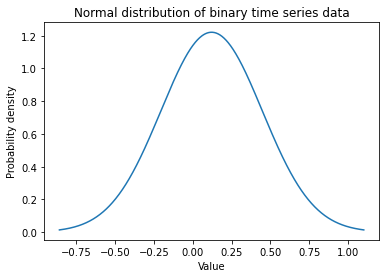

In [7]:
plot_normal_distribution_binary_timeseries(timestamp_col, bin_col)

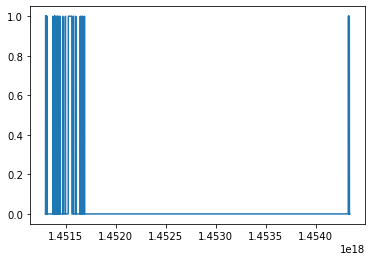

In [8]:
plt.plot(timestamp_col,bin_col)

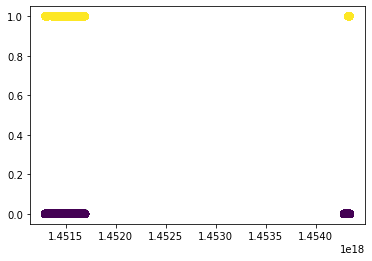

In [9]:
plt.scatter(timestamp_col, bin_col, c=bin_col, s=50, alpha=0.75)